# Analýza datasetu MNIST 
MNIST (Modified National Institute of Standards and Technology) je referenčný dataset obsahujúci ručne písané číslice. Je veľmi často využívaný pri trénovaní obraz-spracujúcich systémov, pričom jadrom tohto využitia je strojové učenie. Jeho autormi sú Yann LeCun-Courant Institute, Corinna Cortes-Google Labs a Christopher J.C. Burges-Microsoft Research.
#### <span style="color: blue;">Štruktúra:</span>
Dataset je tvorený trénovacou a testovaciou sadou dát. Trénovacia sada obsahuje 60 000 vzoriek rukou písaných číslic. Testovacia sada naproti tomu obsahuje 10 000 vzoriek rukou písaných číslic.
#### <span style="color: blue;">Formát vzorky:</span>
Vzorky číslic datasetu majú veľkosť 28x28 pixelov a farebný formát grayscale, teda každý pixel vzorky obsahuje hodnotu reprezentujúcu intenzitu svetla.
#### <span style="color: blue;">Pôvod:</span>
Dataset MNIST bol vytvorený v roku 1998 z NIST Special Database 19, konkrétne datasetov NIST SD-1 a NIST SD-3 Národného inštitútu pre štandardy a technológie (NIST) Spojených štátov amerických. Sady NIST SD-1 a NIST SD-3 boli vytvorené v roku 1995. NIST SD-1 bola pôvodne koncipovaná ako testovacia a NIST SD-3 ako trénovacia sada.
<br>Toto rozdelenie sa ale ukázalo ako nevhodné. NIST SD-3 disponoval čistejšími a kvalitnejšími vzorkami číslic, nakoľko sada  bola vytvorená zozbieraním dát medzi zamestnancami americkej federálnej agentúry Census Bureau a sada NIST SD-1 medzi študentami amerických stredných škôl.
<br>Preto MNIST obsahuje po 30 000 vzoriek z NIST SD-3 a NIST SD-1 v trénovacej sade, a 5 000 vzoriek z NIST SD-3 a NIST SD-1 v testovacej sade. Množiny vzoriek daných sád sú nesúrode.
<br>Pôvodné vzorky číslic z NIST sád boli normalizované tak, aby sa zmestili do rámca o veľkosti 20 x 20 pixelov pri zachovaní ich pomeru strán. Vzorky číslic datasetu MNIST boli vycentrované do rámca o veľkosti 28x28 vypočítaním ťažiska pixelov a transformácou obrázku.

---
## Importovanie modulov:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#príkaz umožnujúci embedded inline kompiláciu modulu matplotlib
%matplotlib inline

---
## Importovanie datasetu:
Na analýzu je potrebné dataset importovať do premennej typu pandas.DataFrame. Do premennej ___mnist_train_df___ sme importovali trénovaciu a do premennej ___mnist_test_df___ testovaciu časť datasetu. Nakoľko v našom prípade je pôvodný dataset typu .csv (Comma-separated value), je na import použitý konštruktor read_csv. 

In [2]:
#inicializácia DataFrame-u zo súboru typu .csv
mnist_train_df = pd.read_csv("/Users/filipeno1/Downloads/Bakalarska_praca/MNIST_csvfile/mnist_train.csv")
mnist_test_df = pd.read_csv("/Users/filipeno1/Downloads/Bakalarska_praca/MNIST_csvfile/mnist_test.csv")

---
## Štruktúra datasetu:
Dataset pozostáva z 785 stĺpcov, prvý s označením ___label___ obsahuje informáciu v nominálnej kategorickej premennej, o ktorú číslicu sa jedná <0; 9>, zvyšných 784 obsahuje informáciu v diskrétnej kvantitatívnej premennej o jednotlivých pixeloch <0; 255> danej číslice pri rozmere mriežky 28x28px. Štruktúra datasetu je pri jeho trénovacej aj testovacej časti zhodna. Trénovacia časť pozostáva z 60 000 riadkov (vzoriek), testovacia z 10 000 riadkov.

#### <span style="color: blue;">Trénovacie dáta:</span>

In [3]:
mnist_train_df

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### <span style="color: blue;">Testovacie dáta:</span>

In [4]:
mnist_test_df

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


---
## Vizualizácia vzoriek dát (číslic):
Na vizualizáciu dát je potrebné previesť dataset z premennej ___mnist_train_df___ typu pandas.DataFrame na premennú ___data___ typu numpy.array.
<br>Z premennej ___data___ vymažeme prvý stĺpec s označením danej číslice, a uložíme ho do samostatnej premennej ___target___.
<br>Do premennej ___img_1___ po preformatovaní na rozmer ___28x28___ uložíme dáta reprezentujúce prvú číslicu.

In [5]:
#inicializácia matice z DataFrame-u
data = np.array(mnist_train_df)

#uloženie informácie o príslušnosti vzorky k číslu 0 až 9 do samostatnej premennej
target = data[:, 0]
#vymzanie informácie o príslušnosti vzorky k číslu 0 až 9 z pôvodnej premennej
data = np.delete(data, 0, 1)

#uloženie a preformátovanie dát reprezentujúcich prvú číslicu do samostatnej premennej
img_1 = data[0].reshape(28, 28)

In [6]:
print(f"Label: {target[0]}")
print(img_1)

Label: 5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 2

---
Samotnú vizualizáciu realizujeme pomocou funkcíí knižnice Matplotlib.

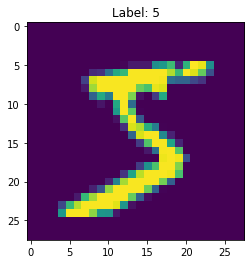

In [7]:
#vizualizácia bez použitia dodatočného filtru
plt.title(f"Label: {target[0]}")
plt.imshow(img_1)

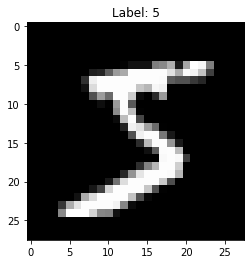

In [8]:
#vizualizácia s použitím čiernobieleho filtra "gray"
plt.title(f"Label: {target[0]}")
plt.imshow(img_1, cmap="gray")

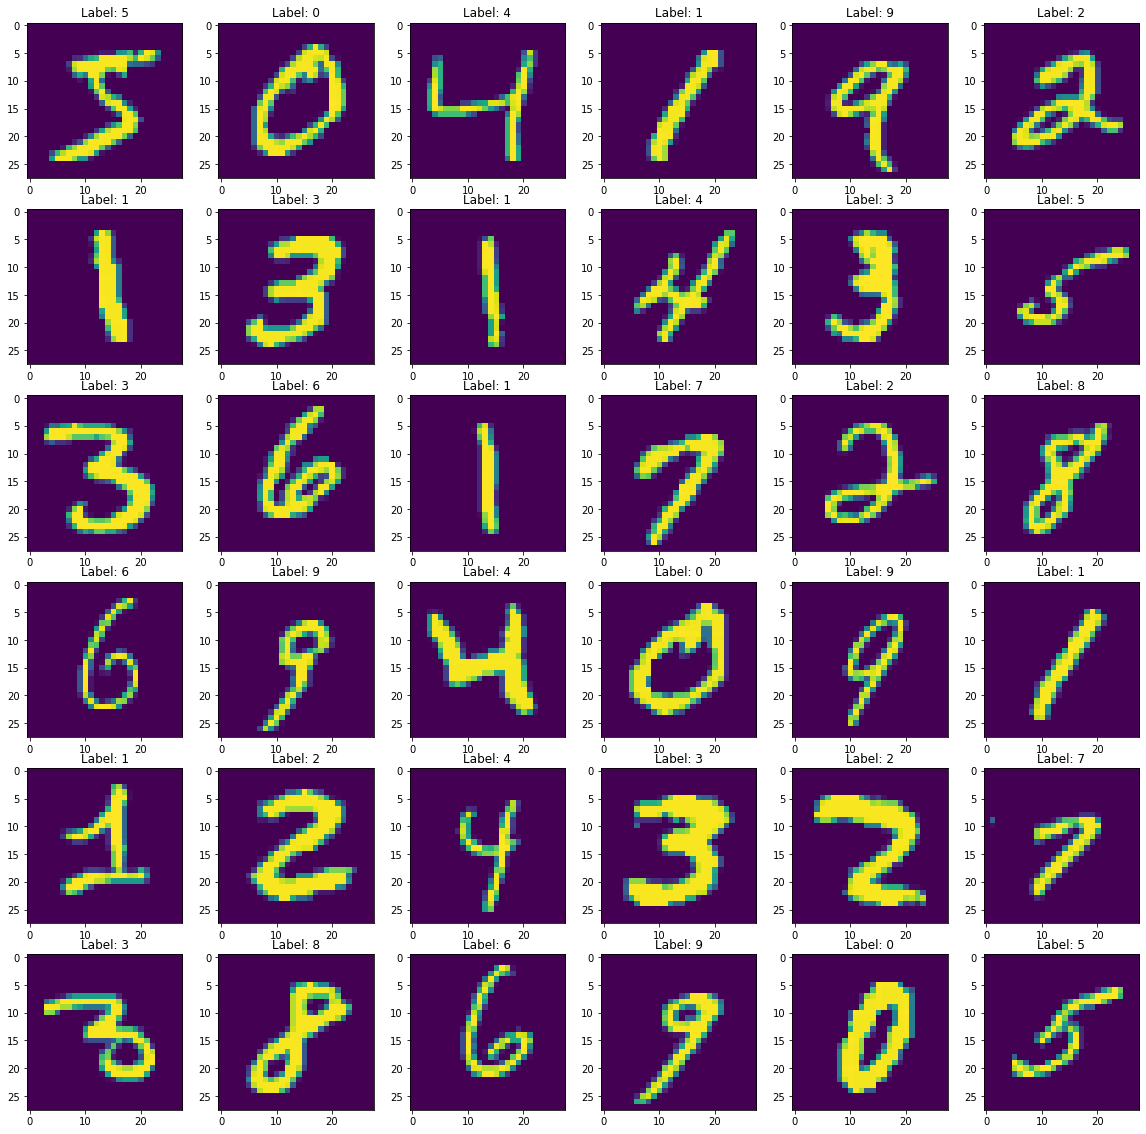

In [9]:
#vizualizácia v mriežke bez použitia dodatočného filtru
f, axarr = plt.subplots(6, 6, figsize=(20,20))
counter = 0

for i in range(0, 6):
    for j in range(0, 6):
        axarr[i, j].set_title(f"Label: {target[counter]}")
        axarr[i, j].imshow(data[counter].reshape(28, 28))
        counter += 1

---
## Rozbor datasetu:
Pri datasetoch určených na použitie pri strojovom učení je dôležitá ich vhodná robustnosť a škálovanie, ktoré dokážu pri vhodnej optimalizácii daného systému (neurónová sieť...) maximalizovať úspešnosť klasifikácie a minimalizovať trénovaci čas.
<br>Nakoľko MNIST je referenčný dataset, tak jeho tŕenovacia aj testovacia časť obsahuje relatívne rovnomerný počet vzoriek.

#### <span style="color: blue;">Trénovacie dáta:</span>

Text(0.5, 0.98, 'Početnosť vzoriek číslic v trénovacom datasete')

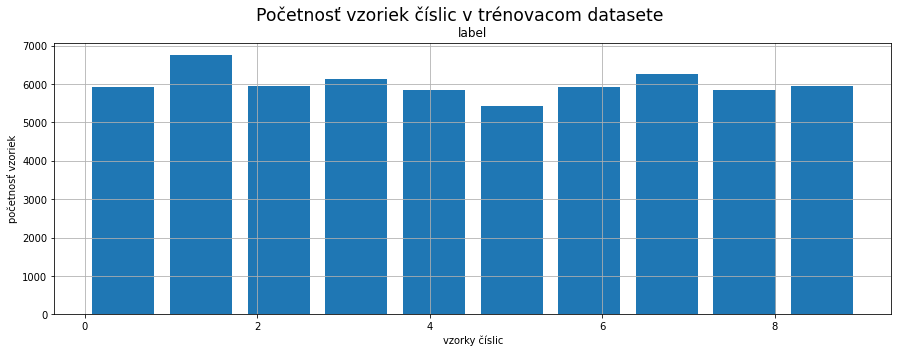

In [10]:
#zobrazenie histogramu zo zvolených údajov ("label")
mnist_train_df.hist(column="label", figsize=(15, 5), rwidth=0.8)
#nastavenie pomenovania x-ovej osi grafu
plt.xlabel("vzorky číslic")
#nastavenie pomenovania y-ovej osi grafu
plt.ylabel("početnosť vzoriek")
#nastavenie názvu grafu
plt.suptitle("Početnosť vzoriek číslic v trénovacom datasete", ha="center", fontsize="xx-large")

In [11]:
print("Početnosť vzoriek číslic v trénovacom datasete:")
sum_of_count = 0
for i in range(0,10):
    count = mnist_train_df[mnist_train_df.label==i].shape[0]
    sum_of_count += count
    print(f" - počet vzoriek čísla {i}: {count}")
avrg = sum_of_count/(i+1)
print(f"\nPriemerný počet vzoriek: {avrg}")

Početnosť vzoriek číslic v trénovacom datasete:
 - počet vzoriek čísla 0: 5923
 - počet vzoriek čísla 1: 6742
 - počet vzoriek čísla 2: 5958
 - počet vzoriek čísla 3: 6131
 - počet vzoriek čísla 4: 5842
 - počet vzoriek čísla 5: 5421
 - počet vzoriek čísla 6: 5918
 - počet vzoriek čísla 7: 6265
 - počet vzoriek čísla 8: 5851
 - počet vzoriek čísla 9: 5949

Priemerný počet vzoriek: 6000.0


#### <span style="color: blue;">Testovacie dáta:</span>

Text(0.5, 0.98, 'Početnosť vzoriek číslic v testovacom datasete')

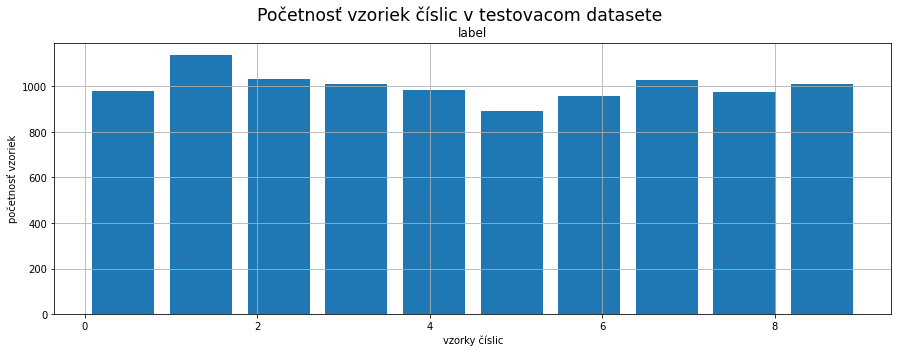

In [12]:
#zobrazenie histogramu zo zvolených údajov ("label")
mnist_test_df.hist(column="label", figsize=(15, 5), rwidth=0.8)
#nastavenie pomenovania x-ovej osi grafu
plt.xlabel("vzorky číslic")
#nastavenie pomenovania y-ovej osi grafu
plt.ylabel("početnosť vzoriek")
#nastavenie názvu grafu
plt.suptitle("Početnosť vzoriek číslic v testovacom datasete", ha="center", fontsize="xx-large")

In [13]:
print("Početnosť vzoriek číslic v testovacom datasete:")
sum_of_count = 0
for i in range(0,10):
    count = mnist_test_df[mnist_test_df.label==i].shape[0]
    sum_of_count += count
    print(f" - počet vzoriek čísla {i}: {count}")
avrg = sum_of_count/(i+1)
print(f"\nPriemerný počet vzoriek: {avrg}")

Početnosť vzoriek číslic v testovacom datasete:
 - počet vzoriek čísla 0: 980
 - počet vzoriek čísla 1: 1135
 - počet vzoriek čísla 2: 1032
 - počet vzoriek čísla 3: 1010
 - počet vzoriek čísla 4: 982
 - počet vzoriek čísla 5: 892
 - počet vzoriek čísla 6: 958
 - počet vzoriek čísla 7: 1028
 - počet vzoriek čísla 8: 974
 - počet vzoriek čísla 9: 1009

Priemerný počet vzoriek: 1000.0


#### <span style="color: blue;">Pomer trénovacích a testovacích dát:</span>

Text(0.5, 0.98, 'Pomer početnosti vzoriek číslic v trénovacom a testovacom datasete')

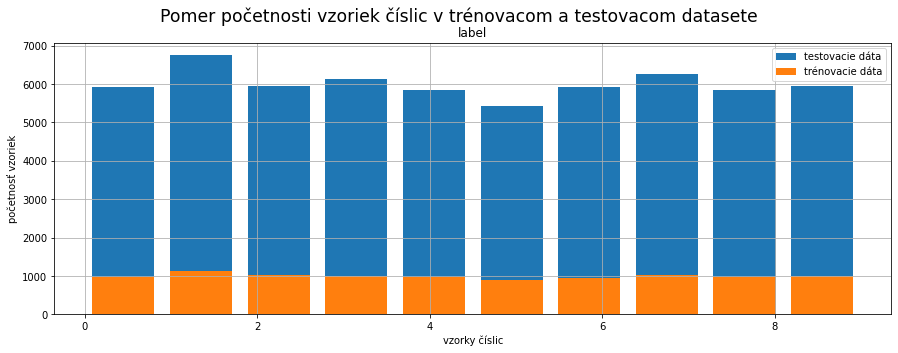

In [17]:
#zobrazenie histogramu zo zvolených údajov ("label")
ax = mnist_train_df.hist(column="label", figsize=(15, 5), rwidth=0.8)
mnist_test_df.hist(ax=ax, column="label", figsize=(15, 5), rwidth=0.8)
#nastavenie legendy
plt.legend(["testovacie dáta", "trénovacie dáta"])
#nastavenie pomenovania x-ovej osi grafu
plt.xlabel("vzorky číslic")
#nastavenie pomenovania y-ovej osi grafu
plt.ylabel("početnosť vzoriek")
#nastavenie názvu grafu
plt.suptitle("Pomer početnosti vzoriek číslic v trénovacom a testovacom datasete", ha="center", fontsize="xx-large")

In [15]:
print("Pomer početnosti vzoriek číslic v trénovacom a testovacom datasete (trénovacie dáta/testovacie dáta):")
for i in range(0,10):
    train_count = mnist_train_df[mnist_train_df.label==i].shape[0]
    test_count = mnist_test_df[mnist_test_df.label==i].shape[0]
    print(f" - počet vzoriek čísla {i}: {train_count}/{test_count}")

Pomer početnosti vzoriek číslic v trénovacom a testovacom datasete (trénovacie dáta/testovacie dáta):
 - počet vzoriek čísla 0: 5923/980
 - počet vzoriek čísla 1: 6742/1135
 - počet vzoriek čísla 2: 5958/1032
 - počet vzoriek čísla 3: 6131/1010
 - počet vzoriek čísla 4: 5842/982
 - počet vzoriek čísla 5: 5421/892
 - počet vzoriek čísla 6: 5918/958
 - počet vzoriek čísla 7: 6265/1028
 - počet vzoriek čísla 8: 5851/974
 - počet vzoriek čísla 9: 5949/1009


---
## Zdroje:

Y. LeCun, L. Bottou, Y. Bengio, and P. Haffner. "Gradient-based learning applied to document recognition." Proceedings of the IEEE, 86(11):2278-2324, November 1998.